In [1]:
%run C:/Users/HSS/dd.py

In [2]:
print('D')

D


## 카테고리 분포의 확률질량함수

- 카테고리 분포는 기본적으로 베루누의 분포 multi 개념
- 카테고리 분포의 n차 시행은 다항분포

In [59]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)
xx = np.arange(1,7)
oh = pd.get_dummies(xx)

pmf = rv.pmf(oh.values)

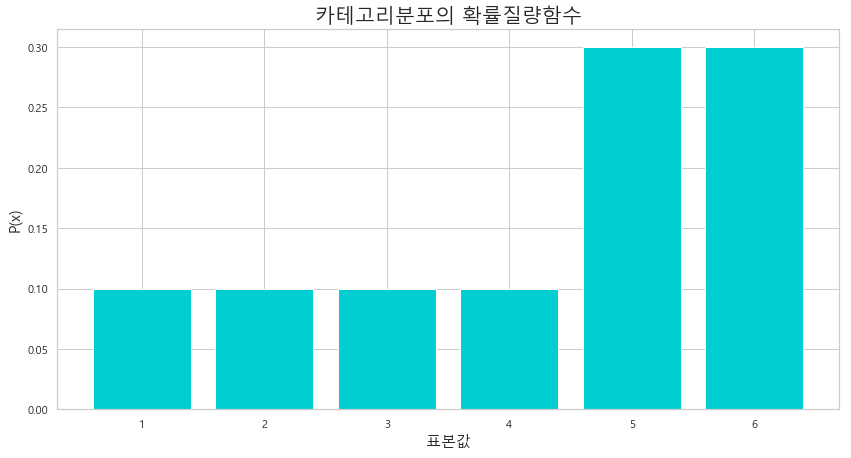

In [60]:
plt.rc('axes', titlesize = 20, labelsize = 15)

plt.figure(figsize = (14,7))
plt.bar(xx,rv.pmf(onehot.values), color = 'darkturquoise')

plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

## 카테고리 분포의 시뮬레이션
- `rv.rvs(n)`: n번의 시뮬레이션

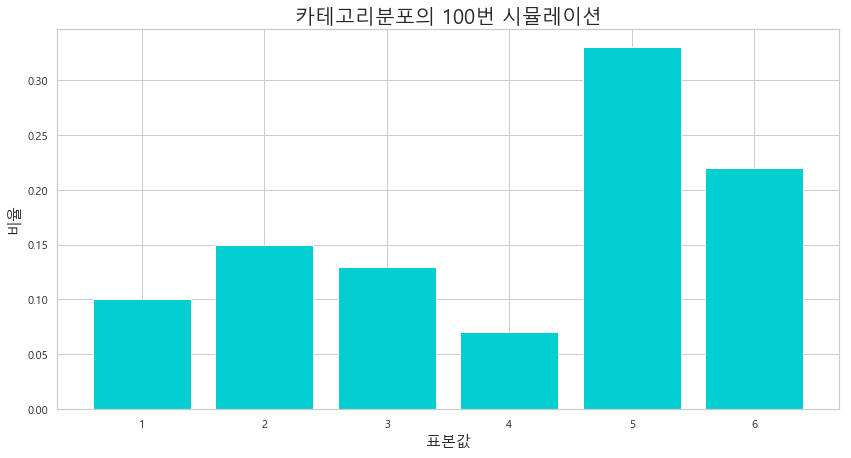

In [66]:
np.random.seed(1)
X = rv.rvs(100) #저절로 원핫 인코딩 되서 나온다.
simul = X.sum(axis = 0) / len(X)

plt.rc('axes', titlesize = 20, labelsize = 15)

plt.figure(figsize = (14,7))
plt.bar(xx,simul, color = 'darkturquoise')

plt.ylabel("비율")
plt.xlabel("표본값")
plt.title("카테고리분포의 100번 시뮬레이션")
plt.show()

In [130]:
df = pd.DataFrame({"이론": rv.pmf(oh.values), "시뮬레이션": simul}, index = np.arange(1,7)).stack()
df =  df.reset_index()
df.columns = ['표본', '유형', '비율']
df

,표본,유형,비율
0,1,시뮬레이션,0.10
1,1,이론,0.10
2,2,시뮬레이션,0.15
3,2,이론,0.10
4,3,시뮬레이션,0.13
5,3,이론,0.10
6,4,시뮬레이션,0.07
7,4,이론,0.10
8,5,시뮬레이션,0.33
9,5,이론,0.30


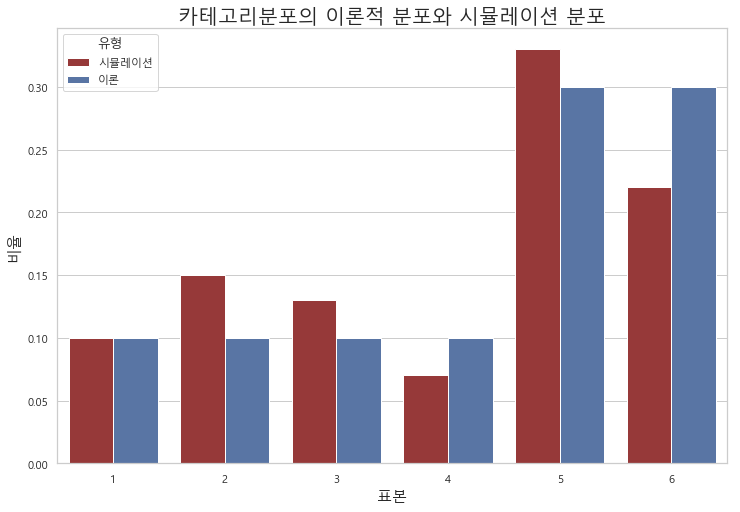

In [131]:
plt.figure(figsize = (12,8))
palette = {'이론': 'b', '시뮬레이션': 'brown'}
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")

sns.barplot(x = '표본', y = '비율', hue = '유형', data = df, palette = palette)
plt.show()

### 연습문제
#### 표본이 10개와 1000개인 경우

- m = [0.25, 0.25, 0.25, 0.25]
- m2 = [0.3,0.3,0.2,0.2]

In [134]:
m1 = [0.25, 0.25, 0.25, 0.25]
m2 = [0.3,0.3,0.2,0.2]

In [153]:
#m1 = [0.25, 0.25, 0.25, 0.25]
rv = sp.stats.multinomial(1, m1)
x = rv.rvs(10)
y = x.sum(axis = 0) / len(x)
xx = np.arange(1,5)

x2 = rv.rvs(1000)
y2 = x2.sum(axis = 0) / len(x2)


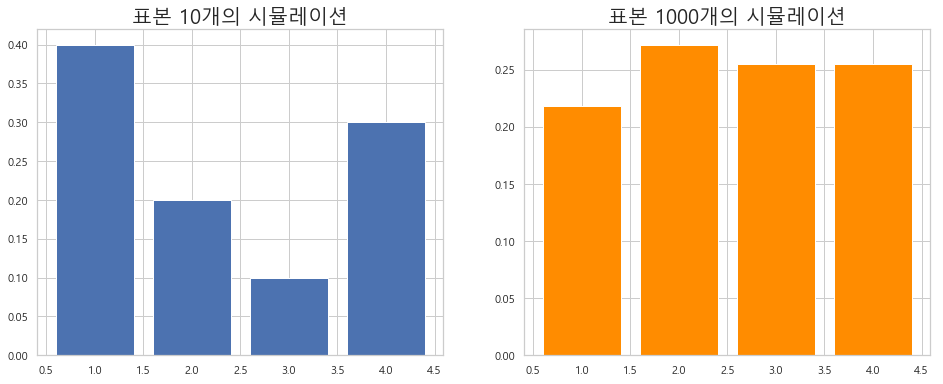

In [162]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.bar(xx, y, color = 'b')
plt.title('표본 10개의 시뮬레이션')

plt.subplot(122)
plt.bar(xx, y2, color = 'darkorange')
plt.title('표본 1000개의 시뮬레이션')

plt.show()

In [165]:
#m2 = [0.3,0.3,0.2,0.2]
rv = sp.stats.multinomial(1, m2)
x = rv.rvs(10)
y = x.sum(axis = 0) / len(x)
xx = np.arange(1,5)

x2 = rv.rvs(1000)
y2 = x2.sum(axis = 0) / len(x2)


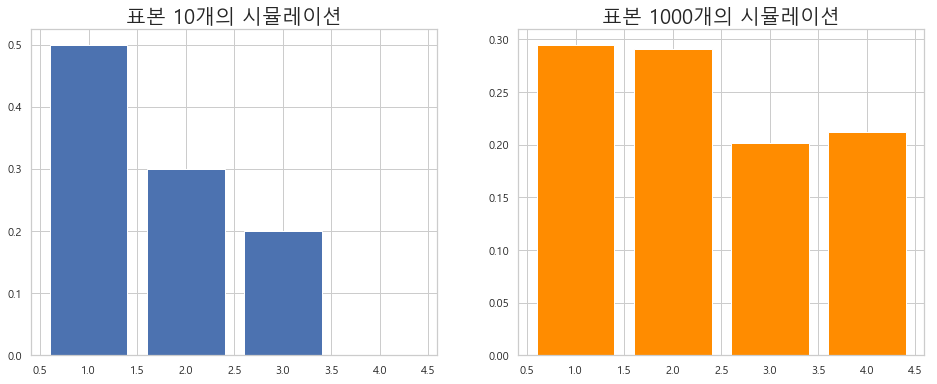

In [168]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.bar(xx, y, color = 'b')
plt.title('표본 10개의 시뮬레이션')

plt.subplot(122)
plt.bar(xx, y2, color = 'darkorange')
plt.title('표본 1000개의 시뮬레이션')

plt.show()

In [11]:
def make_prop(a,b):
    b = min(b,360)
    a = max(a,0)
    
    
    if b <= 90:
        return 1/5 * (b-a)/90
    
    elif b<=180:
        if a >= 90:
            return 2/5 * (b-a)/90
        else:
            return 2/5 * (b-90)/90 + 1/5
    else:
        if a <= 90:
            return 1/5*(90-a)/90 + 2/5 + 1/5*(b-180)/90
        elif a<=180:
            return 1/5*(b-180)/90 + 1/5*(180-a)/90
        else:
            return 2/5* (b-a)/180

In [47]:
def make_prop2(b):
    return make_prop(0,b)

In [12]:
make_prop(90) ,make_prop(180), make_prop(270), make_prop(360)

(0.2, 0.6000000000000001, 0.8, 1.0)

In [48]:
make_prop2(90) ,make_prop2(180), make_prop2(270), make_prop2(360)

TypeError: make_prop() takes 1 positional argument but 2 were given

In [13]:
xx = np.linspace(0,360, 360)

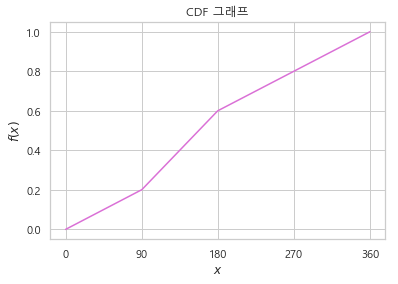

In [46]:
plt.figure(figsize = (6,4))
plt.plot(xx,list(map(make_prop,xx)),color = 'orchid')
plt.xticks([0,90,180,270,360])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('CDF 그래프')
plt.show()

In [49]:
from scipy import stats

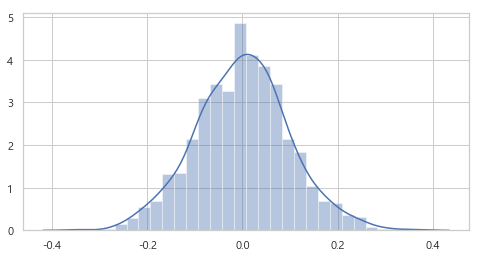

In [55]:
rv = stats.norm(0,0.1).rvs(1000)
plt.figure(figsize = (8,4))
sns.distplot(rv)
plt.show()

In [56]:
max(rv)

0.3590939628140519